# Data Exploration and Visualization for Mayo Clinic STRIP AI

## Overview
In this notebook, we perform exploratory data analysis (EDA) to understand the characteristics of our clot image dataset. We focus on:
- **Class Distribution:** Ensuring balanced representation between the CE and LAA classes.
- **Image Characteristics:** Visualizing sample images and their sliced patches to evaluate preprocessing quality.
- **Statistical Insights:** Analyzing pixel intensity distributions and other image properties.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gc
from PIL import Image, ImageOps 
Image.MAX_IMAGE_PIXELS = 5000000000 
import os
import gc
import cv2
import torch
from torch import nn
import shutil
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from skimage import io
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")
gc.enable()

## Data Loading and Initial Exploration
We begin by loading the dataset metadata and inspecting the distribution of classes. This step confirms the balance between the two classes after necessary adjustments.


In [2]:
df = pd.read_csv('/kaggle/input/mayo-clinic-strip-ai/train.csv')
df.head()

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE


In [3]:
df.label.value_counts()

CE     547
LAA    207
Name: label, dtype: int64

In [4]:
j = 0
for i in list(df[df['label'] == 'CE'].index):
    df.drop(i,inplace=True)
    j += 1
    if j >( 547-207):
        break
df = df.sample(frac=1).reset_index(drop=True)
df.label.value_counts()

LAA    207
CE     206
Name: label, dtype: int64

In [5]:
path_CE = []
path_LAA = []
for i in range(len(df.image_id)):
    if df.label[i] == 'CE':        

        src = f"/kaggle/input/mayo-clinic-strip-ai/train/{df.image_id[i]}.tif"
        path_CE.append(src)
    if df.label[i] == 'LAA':
        
        src = f"/kaggle/input/mayo-clinic-strip-ai/train/{df.image_id[i]}.tif"
        path_LAA.append(src)

In [6]:
!mkdir /kaggle/Clot_Dataset/
!mkdir /kaggle/Clot_Dataset/mayo-clinic
!mkdir /kaggle/Clot_Dataset/mayo-clinic/CE
!mkdir /kaggle/Clot_Dataset/mayo-clinic/LAA


In [7]:
def store_data(new, j):    
    for i in tqdm(new):
        if i[:8] in list(df[df["label"]=='CE'].image_id):
            src = f"/kaggle/input/{j}/train/{i}"
            dst = f"/kaggle/Clot_Dataset/mayo-clinic/CE/{i}"
            img = Image.open(src)
            img_ar = np.array(img)
            mean = img_ar.mean()

            if mean < 240:           
                shutil.copyfile(src, dst)
        elif i[:8] in list(df[df["label"]=='LAA'].image_id):
            src = f"/kaggle/input/{j}/train/{i}"
            dst = f"/kaggle/Clot_Dataset/mayo-clinic/LAA/{i}"
            img = Image.open(src)
            img_ar = np.array(img)
            mean = img_ar.mean()

            if mean < 240:
                shutil.copyfile(src, dst)

In [ ]:
data_list = os.listdir(f"/kaggle/input")

for j in data_list:
    if j == "mayo-clinic-strip-ai":
        pass
    else:
        new = os.listdir(f"/kaggle/input/{j}/train")
        print(j)
        store_data(new, j)

## Visualizations
The following sections visualize sample images, the results of the slicing process, and class distribution. These plots help validate that our preprocessing steps retain meaningful information while filtering out non-informative regions.


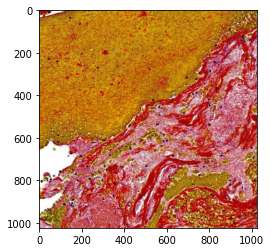

In [9]:
img = cv2.imread('/kaggle/Clot_Dataset/mayo-clinic/LAA/098f15_0-imgslice.4.3.jpg')
plt.imshow(img)

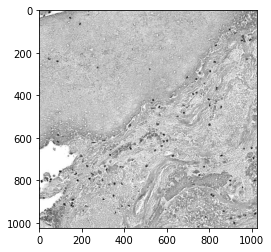

In [10]:
# blue
blue = np.array(img)[:,:,0]
plt.imshow(blue, cmap='gray')

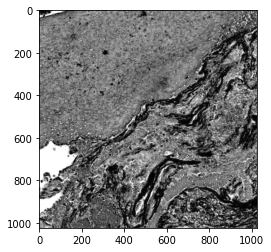

In [11]:
# green
green = np.array(img)[:,:,1]
plt.imshow(green, cmap='gray')

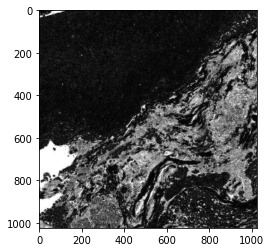

In [12]:
# red
red = np.array(img)[:,:,2]
plt.imshow(red, cmap='gray')

## Summary and Next Steps
This exploratory analysis confirms that our data slicing and preprocessing steps have successfully enhanced the dataset quality. The insights gained here guide further refinement in data augmentation and model training. Next, we will integrate these insights into the baseline model implementation for improved performance.


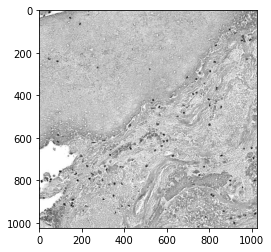

In [13]:
# blue
blue = np.array(img)[:,:,0]
plt.imshow(blue, cmap='gray')